In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pygraphon.matlab_functions.nethist import *


In [3]:
from pygraphon.utils.utils_maltab import getMatlabPaths, setupMatlabEngine, npArray2Matlab
import matlab.engine

engine = matlab.engine.start_matlab()
engine = setupMatlabEngine(engine, getMatlabPaths())


In [4]:
import numpy.random as rnd
import numpy as np


In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
from pygraphon.graphons.StepGraphon import StepGraphon
from pygraphon.plots.plots_graphon import plot as plot_graphon


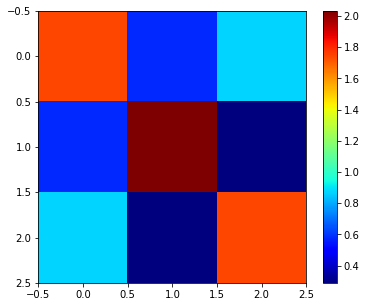

In [7]:
theta = np.array([[0.6, 0.2,0.3] ,[0.2, 0.7,0.1],[0.3,0.1,0.6]])
graphon = StepGraphon(theta, 1/3)
plot_graphon(graphon)
plt.show()

In [8]:
n = 99
A = graphon.draw(0.2, n, exchangeable=False)
argh = n * 1 / 3


In [9]:
graphon.graphon


array([[1.74193548, 0.58064516, 0.87096774],
       [0.58064516, 2.03225806, 0.29032258],
       [0.87096774, 0.29032258, 1.74193548]])

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:>)

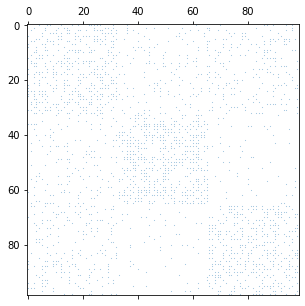

In [10]:
from pygraphon.plots.plot_matrices import spy

spy(A)

In [11]:
labels_matlab, h_matlab, ll_matlab = engine.nethist(npArray2Matlab(A), float(int(argh)), nargout=3)
print(np.asarray([x[0] for x in labels_matlab]))


-2.1662 LL.  Iter 5 of max 500; 2 global improvements; took 0.56694 s
-2.1662 LL.  Iter 10 of max 500; 0 global improvements; took 0.3755 s
-2.1662 LL.  Iter 15 of max 500; 0 global improvements; took 0.36936 s
Local optimum likely reached in random-ordered greedy likelihood search; quitting now
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3.]


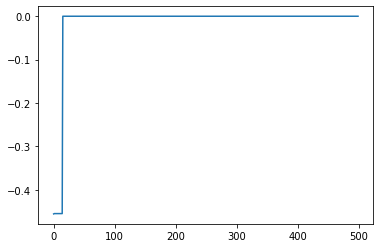

In [29]:
plt.plot([x[0] for x in ll_matlab])

In [41]:
idx,h,trace = nethist(A, argh, verbose= True, trace= True)

Initial log-likelihood: -0.4612
Initial normalized log-likelihood: -2.1975


LL: -2.1679,  4 global improvements:   3%|▎         | 15/500 [00:04<02:21,  3.43it/s]

3 consecutive likelihood improvements less than specified tolerance; quitting now


In [42]:
idx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

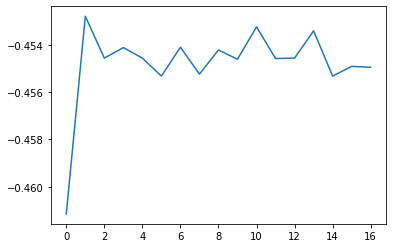

In [43]:
plt.plot(trace[0])
plt.show()

In [ ]:
inputLabelVec = np.array(list(np.repeat(0,argh)) + list(np.repeat(1,argh)))# + list(np.repeat(2,argh)))
inputLabelVec[0] = 1
inputLabelVec[-1] = 0

In [ ]:
from pygraphon.matlab_functions.graphest_fastgreedy import graphest_fastgreedy, fastNormalizedBMLogLik

Initial log-likelihood: -0.4912
Initial normalized log-likelihood: -2.3838


LL: -2.2459,  5 global improvements: 100%|██████████| 50/50 [00:28<00:00,  1.78it/s]


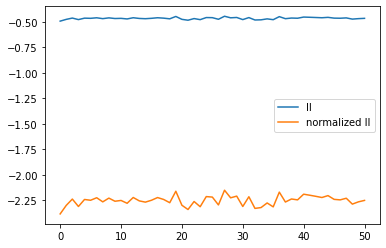

In [ ]:
labels,k, traces = graphest_fastgreedy(A, argh, inputLabelVec=inputLabelVec, trace=True, maxNumRestarts=50, plots = False)
plt.plot(traces[0], label = "ll")
plt.plot(traces[1], label = "normalized ll")
plt.legend()
plt.show()

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(inputLabelVec, labels))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        50
           1       0.92      0.92      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
import cProfile

In [ ]:
cProfile.run('nethist(A, argh, verbose= True, trace= True)')

Initial log-likelihood: -0.4542
Initial normalized log-likelihood: -2.3049


LL: -2.2681,  5 global improvements:   6%|▌         | 30/500 [00:28<07:30,  1.04it/s]

3 consecutive likelihood improvements less than specified tolerance; quitting now
         29514472 function calls (28043077 primitive calls) in 28.796 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(all)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(allclose)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(amax)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(around)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_2d)
      192    0.000    0.000    0.002    0.000 <__array_function__ internals>:177(broadcast_to)
   735692    0.275    0.000   10.503    0.000 <__array_function__ internals>:177(clip)
   601710    0.173    0.000    0.877    0.000 <__array_function__ internals>:177(copy)
       33    0.000    